In [51]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 49.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [67]:
#similarity(유사도)
'''
1. Euclidean similarity(=L2): 두 벡터 사이의 최단거리를 의미. 
   P=(x1, x2, x3, x4,...,xd), Q=(y1, y2, y3, y4, ..., yd)
   유클리디안 거리 = {(x1-y1)제곱+(x2-y2)제곱+(x3-y3)제곱+...+(xd-yd)제곱} 에 루트 씌운 것.

2. Cosine similarity: 벡터 내적 값을 두 벡터의 크기(원점에서부터 해당 벡터까지 거리)의 곱으로 나눈 것.

*** 코사인 유사도를 더 많이 사용한다.

'''

#넘파이로 유사도 구하기 - 직접 함수 정의해서.
import numpy as np
a=np.array((1,2))
b=np.array((3,4))

#유클리디안 유사도
def euclidean(x,y):
  return np.linalg.norm(x-y)

#코사인 유사도
def cosine_similarity(x,y):
  return np.dot(x,y)/np.linalg.norm(x)*np.linalg.norm(y)

eu = euclidean(a,b)
print(eu)

co = cosine_similarity(a,b)
print(co)

2.8284271247461903
24.596747752497684


In [68]:
a

array([1, 2])

In [69]:
#두 문서의 유사도를 코사인 유사도를 이용해 구할 수 있다.
#두 문서를 벡터화한 후 두 벡터의 코사인 유사도를 구하는 것과 같다.

doc1 = np.array((1,0,0,1,2))
doc2 = np.array((1,1,1,0,0))

cosine_similarity(doc1, doc2)

0.7071067811865476

In [86]:
#우리는 지금까지 BoW 구하는데 일일이 코드를 작성했다. 그런데 이제 이렇게 안 해도 된다.
#왜냐하면 사이킷 런으로 모두 구현할 수 있기 때문!

from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer 객체로 BoW 구할 수 있다.
file = '/content/drive/MyDrive/example.txt'
with open(file) as f:
  data = [line.strip() for line in f.readlines()]
data  

bowModel = CountVectorizer()
bowModel.fit_transform(data).todense()

matrix([[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
         0, 0, 0, 2, 0],
        [0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 1, 1, 0],
        [0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
         1, 1, 0, 1, 0]])

In [71]:
#불용어 제거하여 bow 만들기
bowModel = CountVectorizer(stop_words = 'english')
bowModel.fit_transform(data).todense()

matrix([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0],
        [1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0],
        [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]])

In [72]:
#불용어 제거하고 벡터의 특징(feature)개수도 5개로 맞추기
bowModel = CountVectorizer(stop_words='english', max_features=5)
bowModel.fit_transform(data).todense()


matrix([[1, 0, 1, 0, 2],
        [1, 2, 0, 2, 1],
        [1, 0, 0, 0, 1],
        [0, 0, 1, 0, 1]])

In [143]:
#불용어 제거하고 벡터의 특징(feature)개수를 5개로 맞춘 결과를 데이터프레임으로 넣기
bowModel = CountVectorizer(stop_words='english', max_features=5)
result=bowModel.fit_transform(data).todense() #todense()는 matrix(2차원)형태로 만들라는 뜻

import pandas as pd
pd.DataFrame(data=result, columns= bowModel.vocabulary_)


,data,science,arts,graduates,brained
0,1,0,1,0,2
1,1,2,0,2,1
2,1,0,0,0,1
3,0,0,1,0,1


In [78]:
#Q. article 1~5를 가져와서 서로 가장 유사한 문서를 찾기. CountVectorizer 이용해서.
#bag에 들어가는 article들은 모두 string 형태여야 한다.(bag의 성질)

#article1~5 가져오기
path = '/content/drive/MyDrive/'
import os
file_list=[file for file in os.listdir(path) if 'article' in file]
articles = []
for text in file_list:
  dir = os.path.join(path, text)
  with open(dir, encoding='utf-8') as f:
    data = f.read()
  data = data.replace('\n','')
  articles.append(data)

articles
  

['서울 삼성동에 사는 직장인 최모씨(39)는 옷장을 정리하다 마땅하게 입을 만한 겨울 의류가 없자 지난 주말 인근 백화점을 찾았다. 코로나19 장기화로 2년 가까이 재택근무를 했던 만큼 따로 쇼핑하지 않았지만 이달 들어 회사로 출근한 데다 연말을 앞두고 여러군데 모임을 잡았기 때문이다. 최씨는 “집콕에 삼시세끼를 챙기다보니 유행은커녕 몸에 맞는 옷이 거의 없었다”면서 “식사할 때는 마스크를 벗어야 하는데 피부가 엉망이라 결국 지갑을 열었다”고 말했다. ‘위드코로나’와 함께 여성 패션업계에 훈풍이 불고 있다. 재택근무가 줄어 들고 사무실 출근이 늘어난 데다 연말이 다가오면서 각종 모임에 나가기 위해 의류와 화장품 등을 찾는 소비자가 늘고 있어서다. 7일 롯데백화점에 따르면 지난 10월 25일부터 11월6일까지 여성 패션의류 매출이 거리두기 완화 전(10월11~23일)보다 12.6% 증가했다. 주얼리는 46.4%, 기초 화장품은 판매량이 16.3% 증가했고 식당가 매출도 동기간 40.3%나 늘었다. 특히 여성 패션의류는 완화직전 한 주(10월18~24일)에 비해 10월 마지막주 판매량이 17.4% 증가했고 30~40대 고급 패션의류(29.9%)가 잘 나갔다. 롯데백화점 관계자는 “11월부터 매장내 화장품 테스터와 견본품 증정 행사를 재개했고 10명 이내 소규모 형태의 마케팅 행사도 준비 중”이라면서 “다만 마스크 착용이 의무인만큼 메이크업과 스킨케어 서비스는 하지 못하고 있다”고 말했다. ',
 '새 방역체계인 위드 코로나 과정에서 신종 코로나바이러스 감염증(코로나19) 4차 유행이 지속되는 가운데 7일 신규 확진자 수는 2200명대를 기록했다. 닷새 연속 2000명대다.중앙방역대책본부는 이날 0시 기준으로 신규 확진자가 2224명 증가해 누적 37만9935명으로 집계됐다고 밝혔다.전일(2248명)보다는 24명 줄었지만 지난 3일 이후 닷새 연속으로 2000명대를 유지하며 확산세를 이어가고 있는 상황이다. 지난달 30일(발표일 기준 10월 31일) 신규 확진자 

In [79]:
from konlpy.tag import Okt
okt = Okt()
okt.morphs('안녕하세요 제 이름은 이지환입니다.')

articles2 = []
for line in articles:
  tokens=okt.morphs(line)
  tokened_sent = ' '.join(tokens)
  articles2.append(tokened_sent)

articles2

['서울 삼성동 에 사는 직장인 최 모씨 ( 39 ) 는 옷장 을 정리 하다 마땅하게 입 을 만 한 겨울 의류 가 없자 지난 주말 인근 백화점 을 찾았다 . 코로나 19 장기 화로 2년 가까이 재택근무 를 했던 만큼 따로 쇼핑 하지 않았지만 이 달 들어 회사 로 출근 한 데 다 연말 을 앞두고 여러 군데 모임 을 잡았기 때문 이다 . 최씨 는 “ 집콕 에 삼 시세 끼 를 챙기다 보니 유행 은커녕 몸 에 맞는 옷 이 거의 없었다 ” 면서 “ 식사 할 때 는 마스크 를 벗어야 하는데 피부 가 엉망 이라 결국 지갑 을 열었다 ” 고 말 했다 . ‘ 위드 코로나 ’ 와 함께 여성 패션 업계 에 훈풍 이 불 고 있다 . 재택근무 가 줄어 들고 사무실 출근 이 늘어난 데 다 연말 이 다가오면서 각종 모임 에 나가기 위해 의류 와 화장품 등 을 찾는 소비자 가 늘 고 있어 서다 . 7일 롯데 백화점 에 따르면 지난 10월 25일 부터 11월 6일 까지 여성 패션 의류 매출 이 거리 두기 완화 전 ( 10월 11~23일 ) 보다 12.6% 증가 했다 . 주얼리 는 46.4% , 기초 화장품 은 판매량 이 16.3% 증가 했고 식당가 매출 도 동기간 40.3% 나 늘었다 . 특히 여성 패션 의류 는 완화 직전 한 주 ( 10월 18~24일 ) 에 비해 10월 마지막 주 판매량 이 17.4% 증가 했고 30~40 대 고급 패션 의류 ( 29.9% ) 가 잘 나갔다 . 롯데 백화점 관계자 는 “ 11월 부터 매 장내 화장품 테스 터 와 견본 품 증정 행사 를 재개 했고 10 명 이내 소규모 형태 의 마케팅 행사 도 준비 중 ” 이라면서 “ 다만 마스크 착용 이 의무 인 만큼 메이크업 과 스킨 케어 서비스 는 하지 못 하고 있다 ” 고 말 했다 .',
 '새 방역 체계 인 위드 코로나 과정 에서 신종 코로나바이러스 감염증 ( 코로나 19 ) 4 차 유행 이 지속 되는 가운데 7일 신규 확 진자 수 는 2200 명대 를 기록 했다 . 닷새 연속 2000 명대 다 . 중앙 방역 대책 

In [98]:
bow = CountVectorizer(max_features=20)
real_bow=bow.fit_transform(articles2).toarray() #1차원인 array 형태로 변형해라.
article_dic = {}
k=1
for vec in real_bow:
  article_dic[f'article{k}']=vec
  k+=1
article_dic

{'article1': array([4, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 5, 2, 0, 3, 2, 0, 4, 3, 0]),
 'article2': array([1, 0, 1, 0, 0, 1, 0, 1, 1, 5, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0]),
 'article3': array([0, 0, 1, 2, 0, 1, 7, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 6]),
 'article4': array([1, 3, 1, 0, 2, 2, 0, 1, 1, 2, 5, 0, 0, 4, 1, 1, 0, 0, 1, 0]),
 'article5': array([ 0,  0,  1, 11,  2,  1,  0,  0,  3,  3,  0,  0,  0,  0,  0,  3,  3,
         0,  2,  0])}

In [99]:
for art1, vec1 in article_dic.items():
  for art2,vec2 in article_dic.items():
    print(f"{art1}&{art2}", cosine_similarity(article_dic[art1],article_dic[art2]))
  

article1&article1 87.0
article1&article2 11.73853071931389
article1&article3 5.466722735905339
article1&article4 16.920707574672704
article1&article5 24.93854515569741
article2&article1 27.601410069738066
article2&article2 37.0
article2&article3 26.824756617117096
article2&article4 27.31201101980493
article2&article5 59.48608740364922
article3&article1 4.5731238271515835
article3&article2 9.543423027243584
article3&article3 104.0
article3&article4 7.3307833561894755
article3&article5 41.81725352420568
article4&article1 21.334805202848194
article4&article2 14.645571126562063
article4&article3 11.049296652807323
article4&article4 69.0
article4&article5 32.67028965416371
article5&article1 12.99193669787829
article5&article2 13.179552299012101
article5&article3 26.04188243423587
article5&article4 13.498502911001774
article5&article5 167.0


In [141]:
bow = CountVectorizer(max_features=20)
real_bow=bow.fit_transform(articles2).todense() # 2차원 matrix형태로 변형해라

cosine_similarity(real_bow, real_bow) #코사인 유사도 값이 matrix 형태로 추출된다

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([[1.        , 0.31725759, 0.05256464, 0.24522765, 0.14933261],
       [0.31725759, 1.        , 0.25793035, 0.39582625, 0.35620412],
       [0.05256464, 0.25793035, 1.        , 0.10624324, 0.25040272],
       [0.24522765, 0.39582625, 0.10624324, 1.        , 0.19563048],
       [0.14933261, 0.35620412, 0.25040272, 0.19563048, 1.        ]])

In [111]:
#코사인 유사도 내장함수
from sklearn.metrics.pairwise import cosine_similarity
#cosine_similarity(vector1,vector2)

v1=[[2,3]] #2차원이어야 함.
v2=[[3,4]] #2차원이어야 함.

cosine_similarity(v1,v2)

array([[0.99846035]])

In [115]:
a1=np.array([[5,4]])
a2=np.array([[9,2]])
print(cosine_similarity(a1,a2)) #[[0.89778941]]
print(cosine_similarity(a2,a1)) #[[0.89778941]]

[[0.89778941]]
[[0.89778941]]


In [117]:
#bag of ngrams
#시퀀스를 알 수 있는 대신, 연산량 늘어남.

with open('/content/drive/MyDrive/example.txt', encoding='utf-8') as file:
    data2 = [line.strip() for line in file.readlines()]
    
data2


['Data Science is an overlap between Arts and Science.',
 'Generally, Arts graduates are right-brained and Science graduates are left-brained.',
 'Excelling in both Arts and Science at a time becomes difficult.',
 'Natural Language Processing is a part of Data Science.']

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
bowModel2 = CountVectorizer(ngram_range = (2,2), stop_words='english') #ngram_range = (2,2)
bowModel2.fit_transform(data).todense()
bowModel2.vocabulary

result = bowModel2.fit_transform(data).todense()
result

matrix([[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


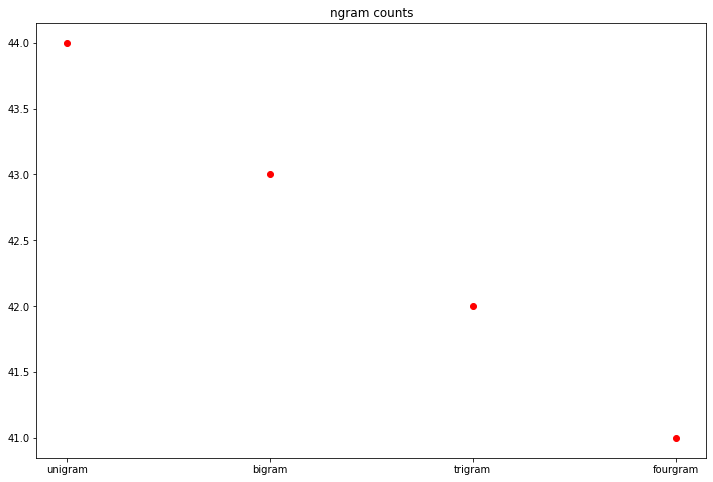

In [132]:
#unigram, bigram, trigram 토큰개수를 그래프로 그려보기

import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

#unigram
lowered_data=word_tokenize(' '.join(data2).lower())
unigram=len(lowered_data)

#bigram
bigram = len(list(ngrams(lowered_data, 2)))

#trigram
trigram = len(list(ngrams(lowered_data, 3)))

#fourgram
fourgram = len(list(ngrams(lowered_data, 4)))

counts = [unigram,bigram, trigram,fourgram]

plt.figure(figsize=(12,8))
plt.plot(counts, 'ro')
plt.xticks(range(4), ['unigram','bigram','trigram','fourgram'])
plt.title('ngram counts')
plt.show()

In [133]:
#spacy - 명사를 추출하는데 사용하는 패키지

!pip install spacy

In [136]:
import spacy
nlp = spacy.load('en_core_web_sm')
docs = nlp('I am a student')
docs

I am a student

In [140]:
nlp = spacy.load('en_core_web_sm')
docs2 = nlp(' '.join(data2))
data2_nouns=list(docs2.noun_chunks) #명사만 추출한 결과를 리스트로 형변환.
data2_nouns

[Data Science,
 an overlap,
 Arts,
 Science,
 Arts graduates,
 right-brained and Science graduates,
 both Arts,
 Science,
 a time,
 Natural Language Processing,
 a part,
 Data Science]

In [ ]:
# TF-IDF : 여러 문서들이 있을 때, 특정 단어가 어떤 문서에서 얼마나 중요한지를 나타낸다.
"""
term frequency(단어 빈도) x Inverse document frequency(역 문서 빈도)
      = len(단어 총 개수) x log(전체문서수/단어등장 문서수)
"""
#zip's law를 이용해 만듦.
#--> 순위와 빈도수는 반비례한다.
#--> 1위가 3만개면 2위는 만 오천개, 3위는 만개 ......